In [10]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

os.makedirs("tmp", exist_ok=True)

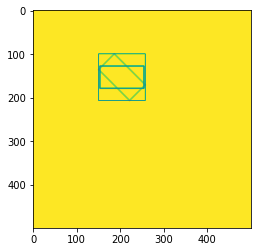

In [20]:
#iamge
img = np.ones((500, 500))*255
#target in center format => find target in bbox??
cx, cy, w, h, alpha = 204.2, 154.0, 100.5, 50.2, np.pi/4

#step1: src for straight rectangle
tl = (cx-w/2, cy-h/2)
tr = (cx+w/2, cy-h/2)
bl = (cx-w/2, cy+h/2)
br = (cx+w/2, cy+h/2)
src_points = np.array([tl, tr, br, bl]).T

#step2: center, angle => rotation matrix
rotation_matrix = cv2.getRotationMatrix2D((cx, cy), -alpha/np.pi*180, 1)
R = np.array(rotation_matrix[:2, :2])
t = np.array(rotation_matrix[:, 2])

#step3: multiply rotation matrix with src_points
x = R@src_points + np.expand_dims(t, 1)
x = x.astype(np.int32).T

result_tl = (np.min(x[:,0]), np.min(x[:,1]))
result_br = (np.max(x[:,0]), np.max(x[:,1]))

# #Visualize =>target in bbox
x = x.reshape((-1, 1, 2))
result = cv2.polylines(img, [x], True, 200, 2)
result = cv2.polylines(result, [src_points.astype(np.int32).T], True, 127, 2)
# cv2.imwrite(os.path.join('tmp', 'result.png'), result)
cv2.rectangle(result, result_tl, result_br, color=0)
plt.imshow(result)
plt.show()

In [10]:
# x = R@(src_points + np.expand_dims(t, 1))
x = R@src_points + np.expand_dims(t, 1)

x = x.astype(np.int32).T
x = x.reshape((-1, 1, 2))

result = cv2.polylines(img, [x], True, 0, 2)

result = cv2.polylines(result, [src_points.astype(np.int32).T], True, 127, 2)

cv2.imwrite(os.path.join('tmp', 'result.png'), result)

True